In [21]:
import sys
sys.path.append('/global/homes/a/arosado/LSSutils/')

from lssutils.lab import get_meandensity
from lssutils.dataviz import mollview, mycolor

In [2]:
import sys 
sys.path.append("/global/homes/a/arosado/sysgen/")
from utils import normalize_selection_func, make_hp, project2hp, radec2hpix
from astropy.table import Table, vstack

import os
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import fitsio as ft

In [3]:
def mollview_plot(hpmap, *args, **kw):
    p = np.percentile(hpmap[hpmap>0], [0,1,99,100])
    mollview(hpmap, p[1], p[2], *args, **kw)

In [5]:
scratch = os.getenv('CSCRATCH')
out_dir = os.path.join(scratch,'test_sysnet','contaminated_mocks')

# get NN-weights
nn_pred = hp.read_map(f'/global/cscratch1/sd/arosado/test_sysnet/windows_clean_test1/nn-weights.hp256.fits')
npred = normalize_selection_func(nn_pred)
npred[npred==0.0] = np.nan

using mean for normalizing selection function


In [6]:
mock = ft.read('/global/cscratch1/sd/arosado/test_sysnet/contaminated_mocks/cutsky_LRG_z0.800_AbacusSummit_base_c000_ph000.fits')
mock_hmap = project2hp(256, mock)
hpix = radec2hpix(256,mock['RA'],mock['DEC'])

n = make_hp(npred[hpix], hpix, 256)

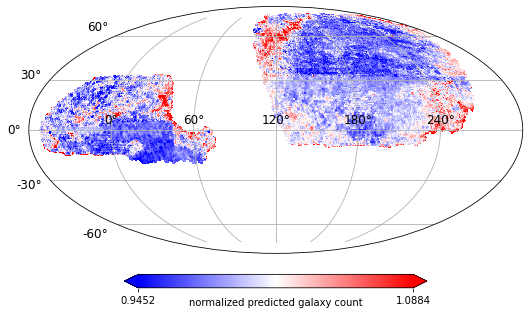

In [7]:
mollview_plot(n, 'normalized predicted galaxy count', colorbar=True)

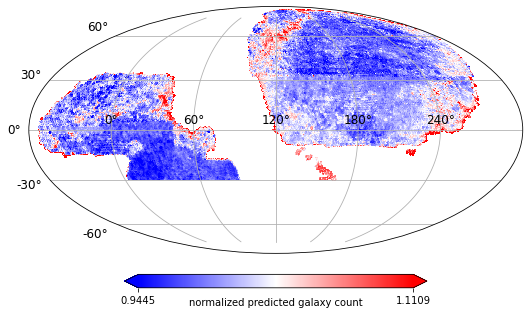

In [8]:
mollview_plot(npred, 'normalized predicted galaxy count', colorbar=True)
fn = os.path.join(f'nn_normed_hmap.png')
#plt.savefig(fn, facecolor='white',bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

In [12]:
# here we read data used for NN training, also make ngal healpix map for all regions

hpmap = np.zeros(12*256*256)
count = np.zeros(12*256*256)
frac = np.zeros(12*256*256)


for region in ['bmzls', 'ndecals', 'sdecals']:
    d = ft.read(f'/global/cscratch1/sd/arosado/nlrg_features_{region}_256.fits')
    hpmap[d['hpix']] += d['label']
    frac[d['hpix']] += d['fracgood']
    count[d['hpix']] += 1.0

ngal = hpmap
ngal[ngal==0.0] = np.nan
nn_test1 = hp.read_map(f'/global/cscratch1/sd/arosado/test_sysnet/windows_clean_test1/nn-weights.hp256.fits')

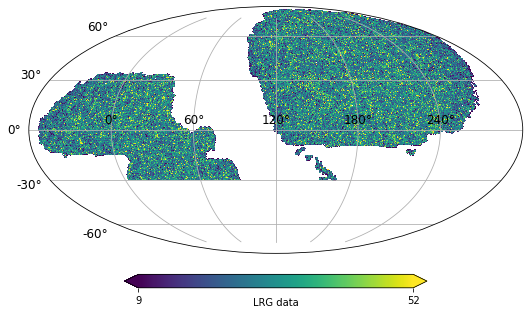

In [27]:
mollview_plot(ngal,'LRG data', cmap='viridis', colorbar=True)
fn = os.path.join(f'LRG_hmap_original.png')
#plt.savefig(fn,bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

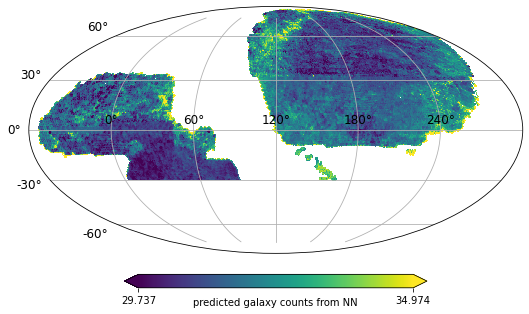

In [29]:
mollview_plot(nn_test1,'predicted galaxy counts from NN',cmap='viridis', colorbar=True)
fn = os.path.join(f'LRG_hmap_npred.png')
#plt.savefig(fn,bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

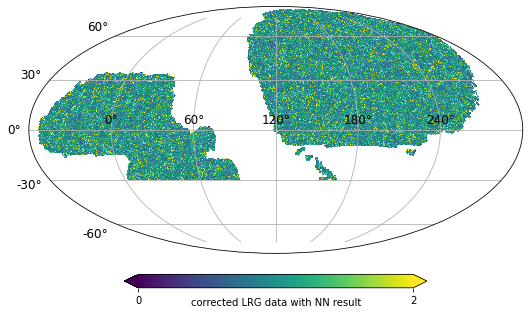

In [28]:
mollview(nn_test1*frac/ngal, 0.0, 2.0,'corrected LRG data with NN result', cmap='viridis',colorbar=True)
fn = os.path.join(f'LRG_hmap_corrected.png')
#plt.savefig(fn,bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()